#Step 1: Understand Variables
##Key Features:
##Outcome Variables:

Derived Features:
Calculate the difference between the highest and lowest blood pressure readings (SBP range, DBP range) to capture BP fluctuations.
Combine proteinuria readings across time points into a single aggregated feature (e.g., mean or max proteinuria).
Create interaction terms (e.g., SBP × APH) to capture combined effects.


Anterpartum Hemorrhage (APH): Dependent variable 1.
Hypertension in Labor (LABOUR_HTN): Dependent variable 2.
##Predictor Variables:

**Physiological**: MAT_WEIGHT, SBP/DBP values, UDIP_PROT (Proteinuria).

**Pregnancy History**: PREV_SB, PREV_MIS, PREV_PTB, PREV_CS, PREV_MULTIP.

**Birth-Related**: BIRTH_WEIGHT, GAGEBRTH, SINGLE_TWIN.

**Socio-economic**: WEALTH_INDEX, PW_EDUCATION.

**Maternal Factors**: PW_AGE, GRAVIDITY, PARITY.

**Time-Based and Derived Features:**

Calculate intervals (e.g., DEL_DATE - LABOUR_24).

Previous outcomes as summary statistics (e.g., total complications).


#Step 2: Data Preprocessing
**Data Cleaning:** Handle missing values in variables like UDIP_PROT, PW_EDUCATION, DEL_DATE.

**Standardization/Normalization:** Normalize continuous features like SBP/DBP, MAT_WEIGHT, BIRTH_WEIGHT.

**Categorical Encoding**: Convert categorical data (e.g., SINGLE_TWIN, TYPEDELIV) to numerical format using one-hot encoding or label encoding.


#Step 3: Feature Engineering
Aggregate SBP/DBP values (e.g., mean or trend over time).
Encode pregnancy history (e.g., create a risk index from PREV_SB, PREV_CS).
Interaction features (e.g., WEALTH_INDEX × PW_EDUCATION).
#Step 4: Model Development
##Objective 1: Predict APH

Binary Classification using Logistic Regression, Random Forest, or Gradient Boosting.
Consider imbalanced data techniques like SMOTE or class-weighted loss.
##Objective 2: Predict HTNL

Similar classification approaches, but experiment with time-based features like LABOUR_24.
#Evaluation Metrics:

Accuracy, Precision, Recall, F1-Score for model comparison.
Use ROC-AUC for imbalanced targets.
#Step 5: Explainability and Interpretability
Apply SHAP or LIME to explain how features like MAT_WEIGHT, PW_AGE influence predictions.
Use class-contrastive techniques to identify unique risk factors for APH vs. HTNL.
#Step 6: Validate with Domain Experts
Collaborate with obstetricians to validate the importance of key features and the model’s risk factor identification.

# Columns Description

Here's a one-word explanation for each column:

1. **WHOWID**: Identifier  
2. **ORIG_ID**: Original ID  
3. **PARTICIPANT_ID**: Participant  
4. **PW_AGE**: Maternal Age  
5. **PW_EDUCATION**: Education  
6. **PREV_SB**: Spontaneous Abortion  
7. **PREV_MIS**: Miscarriage  
8. **PREV_PTB**: Preterm Birth  
9. **PREV_MULTIP**: Multiples  
10. **PREV_CS**: Cesarean Section  
11. **WEALTH_INDEX**: Socioeconomic  
12. **SINGLE_TWIN**: Pregnancy Type  
13. **GRAVIDITY**: Pregnancies  
14. **PARITY**: Births  
15. **LABOUR_HTN**: Hypertension  
16. **LABOUR_24**: Labor Start  
17. **BIRTH_OUTCOME**: Outcome  
18. **BABY_SEX**: Sex  
19. **BIRTH_WEIGHT**: Birth Weight  
20. **BABY_ID1**: Baby ID 1  
21. **BIRTH_OUTCOME1**: Outcome 1  
22. **BABY_SEX1**: Sex 1  
23. **BIRTH_WEIGHT1**: Birth Weight 1  
24. **BABY_ID2**: Baby ID 2  
25. **BIRTH_OUTCOME2**: Outcome 2  
26. **BABY_SEX2**: Sex 2  
27. **BIRTH_WEIGHT2**: Birth Weight 2  
28. **BABY_ID3**: Baby ID 3  
29. **BIRTH_OUTCOME3**: Outcome 3  
30. **BABY_SEX3**: Sex 3  
31. **BIRTH_WEIGHT3**: Birth Weight 3  
32. **SBP1**: Systolic BP 1  
33. **DBP1**: Diastolic BP 1  
34. **UDIP_PROT1**: Proteinuria 1  
35. **SBP2**: Systolic BP 2  
36. **DBP2**: Diastolic BP 2  
37. **UDIP_PROT2**: Proteinuria 2  
38. **SBP3**: Systolic BP 3  
39. **DBP3**: Diastolic BP 3  
40. **UDIP_PROT3**: Proteinuria 3  
41. **SBP4**: Systolic BP 4  
42. **DBP4**: Diastolic BP 4  
43. **UDIP_PROT4**: Proteinuria 4  
44. **DEL_DATE**: Delivery Date  
45. **GAGEBRTH**: Gestational Age  
46. **TYPEDELIV**: Delivery Type  
47. **age_death_b1**: Baby Death Age 1  
48. **age_death_b2**: Baby Death Age 2  
49. **age_death_b3**: Baby Death Age 3  
50. **APH**: Antepartum Hemorrhage  
51. **MAT_WEIGHT**: Maternal Weight

##Missing value imputation
Few Missing Values (≤5% missing):
Mean Imputation for normally distributed data.
Median Imputation for skewed data or presence of outliers.

Mode for cat values



# Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import KNNImputer

warnings.filterwarnings('ignore')

# **EDA**

In [3]:
df = pd.read_excel('/content/drive/MyDrive/4501_AMANHI_With_USG.xlsx')
df.head(5)

,WHOWID,ORIG_ID,PARTICIPANT_ID,PW_AGE,PW_EDUCATION,PREV_SB,PREV_MIS,PREV_PTB,PREV_MULTIP,PREV_CS,...,DBP4,UDIP_PROT4,DEL_DATE,GAGEBRTH,TYPEDELIV,age_death_b1,age_death_b2,age_death_b3,APH,MAT_WEIGHT
0,20-016580,16580,AMANHIT-20916,36,10.0,1,2,0,1,0,...,69.0,0.0,2014-10-31,271.0,Normally through the vagina,NaN,NaN,NaN,0.0,45.8
1,20-016683,16683,AMANHIT-22194,32,10.0,0,0,0,0,0,...,73.0,0.0,2015-01-06,274.0,Normally through the vagina,NaN,NaN,NaN,0.0,NaN
2,20-016685,16685,AMANHIT-22712,18,6.0,0,1,0,0,0,...,70.0,0.0,2015-01-31,290.0,Normally through the vagina,NaN,NaN,NaN,0.0,68.0
3,20-016687,16687,AMANHIT-22093,30,6.0,1,0,0,0,0,...,70.0,0.0,2014-12-02,275.0,Normally through the vagina,NaN,NaN,NaN,0.0,NaN
4,20-016690,16690,AMANHIT-22563,22,10.0,-88,-88,-88,-88,-88,...,74.0,0.0,2014-11-24,290.0,Normally through the vagina,NaN,NaN,NaN,0.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4501 entries, 0 to 4500
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   WHOWID          4501 non-null   object        
 1   ORIG_ID         4501 non-null   int64         
 2   PARTICIPANT_ID  4501 non-null   object        
 3   PW_AGE          4501 non-null   int64         
 4   PW_EDUCATION    4485 non-null   float64       
 5   PREV_SB         4501 non-null   int64         
 6   PREV_MIS        4501 non-null   int64         
 7   PREV_PTB        4501 non-null   int64         
 8   PREV_MULTIP     4501 non-null   int64         
 9   PREV_CS         4501 non-null   int64         
 10  WEALTH_INDEX    4501 non-null   object        
 11  SINGLE_TWIN     4501 non-null   int64         
 12  GRAVIDITY       4501 non-null   int64         
 13  PARITY          4501 non-null   int64         
 14  LABOUR_HTN      4501 non-null   int64         
 15  LABO

In [5]:
df.describe()

,ORIG_ID,PW_AGE,PW_EDUCATION,PREV_SB,PREV_MIS,PREV_PTB,PREV_MULTIP,PREV_CS,SINGLE_TWIN,GRAVIDITY,...,SBP4,DBP4,UDIP_PROT4,DEL_DATE,GAGEBRTH,age_death_b1,age_death_b2,age_death_b3,APH,MAT_WEIGHT
count,4501.000000,4501.000000,4485.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,...,3843.000000,3843.000000,3843.000000,4366,4366.000000,87.000000,12.000000,0.0,4414.000000,4170.000000
mean,27780.755610,27.996001,7.376589,-15.541435,-15.365030,-18.932459,-15.594979,-15.595201,-1.192402,4.333037,...,119.436378,75.543326,-2.308353,2016-08-24 17:12:20.448923392,272.433349,5.344828,10.916667,NaN,0.038740,59.798537
min,16580.000000,18.000000,0.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-77.000000,...,89.000000,58.000000,-77.000000,2014-08-07 00:00:00,60.000000,0.000000,0.000000,NaN,0.000000,35.000000
25%,25134.000000,23.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,110.000000,68.000000,0.000000,2015-08-08 00:00:00,270.000000,0.000000,0.750000,NaN,0.000000,50.000000
50%,28008.000000,27.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,...,118.000000,74.000000,0.000000,2016-08-19 00:00:00,277.000000,1.000000,2.000000,NaN,0.000000,57.000000
75%,31157.000000,32.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,...,127.000000,81.000000,0.000000,2017-07-12 00:00:00,283.000000,3.000000,19.750000,NaN,0.000000,66.800000
max,34290.000000,49.000000,15.000000,1.000000,7.000000,1.000000,1.000000,1.000000,3.000000,16.000000,...,235.000000,161.000000,2.000000,2018-09-29 00:00:00,328.000000,36.000000,39.000000,NaN,1.000000,125.000000
std,4335.755014,6.259356,3.473069,33.622445,33.709515,35.642800,33.596841,33.596734,13.690641,5.667368,...,13.851439,10.106120,13.359031,NaN,25.454423,10.098155,14.749165,NaN,0.192997,13.624269


In [6]:
df.shape

(4501, 51)

## Missing Values

## Removing -88 and -77


In [7]:
df.replace([-88, -77], np.nan, inplace=True)

In [8]:
df.isnull().sum()


,0
WHOWID,0
ORIG_ID,0
PARTICIPANT_ID,0
PW_AGE,0
PW_EDUCATION,16
PREV_SB,801
PREV_MIS,801
PREV_PTB,996
PREV_MULTIP,801
PREV_CS,801


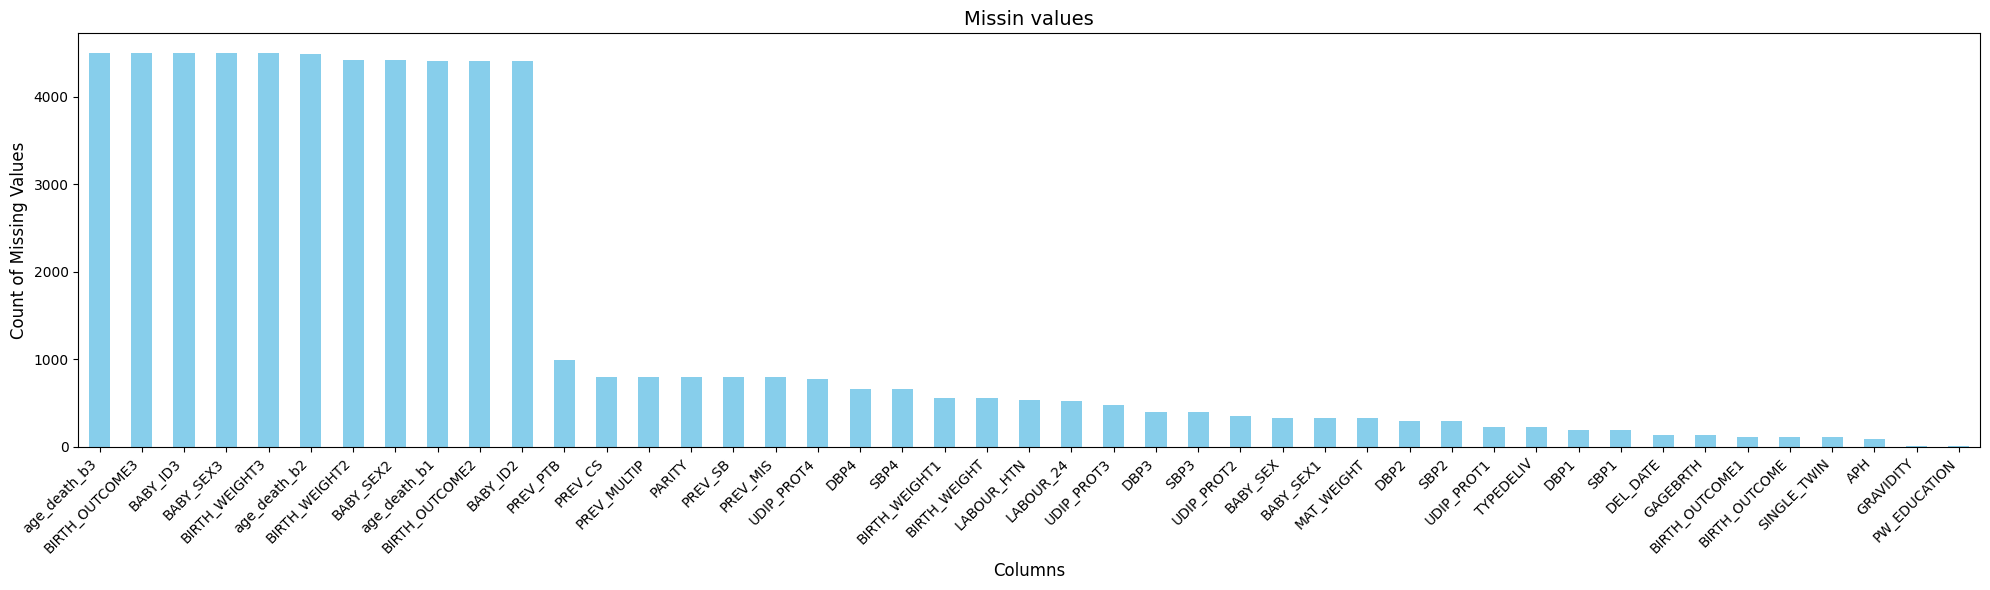

In [9]:
missing_values = df.isnull().sum()
missing_values

plt.figure(figsize=(20, 6))
missing_values[missing_values > 0].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Missin values', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Count of Missing Values', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Handling duplicates

In [10]:
duplicate_rows = df[df.duplicated(subset=['PARTICIPANT_ID'], keep=False)]
duplicate_rows.head()

,WHOWID,ORIG_ID,PARTICIPANT_ID,PW_AGE,PW_EDUCATION,PREV_SB,PREV_MIS,PREV_PTB,PREV_MULTIP,PREV_CS,...,DBP4,UDIP_PROT4,DEL_DATE,GAGEBRTH,TYPEDELIV,age_death_b1,age_death_b2,age_death_b3,APH,MAT_WEIGHT
0,20-016580,16580,AMANHIT-20916,36,10.0,1.0,2.0,0.0,1.0,0.0,...,69.0,0.0,2014-10-31,271.0,Normally through the vagina,NaN,NaN,NaN,0.0,45.8
11,20-016716,16716,AMANHIT-22717,20,10.0,NaN,NaN,NaN,NaN,NaN,...,74.0,0.0,2014-11-19,269.0,Normally through the vagina,NaN,NaN,NaN,0.0,NaN
16,20-016737,16737,AMANHIT-20353,27,0.0,0.0,2.0,0.0,0.0,0.0,...,75.0,0.0,2015-01-03,277.0,Normally through the vagina,NaN,NaN,NaN,1.0,63.5
17,20-016739,16739,AMANHIT-20094,28,0.0,0.0,0.0,0.0,0.0,0.0,...,78.0,0.0,2014-11-04,270.0,Normally through the vagina,NaN,NaN,NaN,0.0,NaN
22,20-016758,16758,AMANHIT-21826,33,10.0,0.0,1.0,1.0,0.0,0.0,...,87.0,0.0,2014-12-13,281.0,Normally through the vagina,NaN,NaN,NaN,0.0,55.0


In [11]:
df = df.dropna(axis=1, thresh=int(0.8 * len(df)))
df = df.drop(columns=['APH','GAGEBRTH','WHOWID','ORIG_ID'], errors='ignore')


In [12]:
df.columns

Index(['PARTICIPANT_ID', 'PW_AGE', 'PW_EDUCATION', 'PREV_SB', 'PREV_MIS',
       'PREV_MULTIP', 'PREV_CS', 'WEALTH_INDEX', 'SINGLE_TWIN', 'GRAVIDITY',
       'PARITY', 'LABOUR_HTN', 'LABOUR_24', 'BIRTH_OUTCOME', 'BABY_SEX',
       'BIRTH_WEIGHT', 'BABY_ID1', 'BIRTH_OUTCOME1', 'BABY_SEX1',
       'BIRTH_WEIGHT1', 'SBP1', 'DBP1', 'UDIP_PROT1', 'SBP2', 'DBP2',
       'UDIP_PROT2', 'SBP3', 'DBP3', 'UDIP_PROT3', 'SBP4', 'DBP4',
       'UDIP_PROT4', 'DEL_DATE', 'TYPEDELIV', 'MAT_WEIGHT'],
      dtype='object')

In [13]:
df = df.drop(columns=['PARTICIPANT_ID'], errors='ignore')


## Handling missing value

In [14]:
from sklearn.impute import SimpleImputer, KNNImputer

# Split the dataframe into numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


In [15]:
missing_percentage_numeric = (df[numeric_cols].isnull().sum() / len(df)) * 100
missing_percentage_categorical = (df[categorical_cols].isnull().sum() / len(df)) * 100
print(missing_percentage_numeric)
print(missing_percentage_categorical)

PW_AGE             0.000000
PW_EDUCATION       0.355477
PREV_SB           17.796045
PREV_MIS          17.796045
PREV_MULTIP       17.796045
PREV_CS           17.796045
SINGLE_TWIN        2.554988
GRAVIDITY          0.355477
PARITY            17.796045
LABOUR_HTN        12.019551
LABOUR_24         11.597423
BIRTH_OUTCOME      2.554988
BABY_SEX           7.376139
BIRTH_WEIGHT      12.397245
BIRTH_OUTCOME1     2.554988
BABY_SEX1          7.376139
BIRTH_WEIGHT1     12.397245
SBP1               4.421240
DBP1               4.421240
UDIP_PROT1         5.087758
SBP2               6.487447
DBP2               6.487447
UDIP_PROT2         7.753832
SBP3               8.753610
DBP3               8.753610
UDIP_PROT3        10.730949
SBP4              14.618974
DBP4              14.618974
UDIP_PROT4        17.262830
MAT_WEIGHT         7.353921
dtype: float64
WEALTH_INDEX    0.000000
BABY_ID1        0.000000
TYPEDELIV       4.976672
dtype: float64


### Handle Numeric Columns

In [16]:

# Separate numeric columns into different ranges of missing values
num_few_missing = missing_percentage_numeric[missing_percentage_numeric <= 5].index
num_moderate_missing = missing_percentage_numeric[(missing_percentage_numeric > 5) & (missing_percentage_numeric <= 30)].index
num_high_missing = missing_percentage_numeric[missing_percentage_numeric > 30].index


In [17]:
# Impute numeric columns with few missing values (≤5%) using mean
if num_few_missing.any():
    mean_imputer = SimpleImputer(strategy='mean')
    df[num_few_missing] = mean_imputer.fit_transform(df[num_few_missing])

# Impute numeric columns with moderate missing values (5%-30%) using KNN
if num_moderate_missing.any():
    knn_imputer = KNNImputer(n_neighbors=5)
    df[num_moderate_missing] = knn_imputer.fit_transform(df[num_moderate_missing])

# Handle high missing values for numeric columns using KNN
if num_high_missing.any():
    if 'LABOUR_HTN' in num_high_missing:
        # Special handling for LABOUR_HTN with KNN
        df['LABOUR_HTN'] = knn_imputer.fit_transform(df[['LABOUR_HTN']])
        num_high_missing = num_high_missing.drop('LABOUR_HTN')
    # Drop remaining high-missing numeric columns
    df.drop(columns=num_high_missing, inplace=True)

### Handle Categorical Columns

In [18]:


# Separate categorical columns into different ranges of missing values
cat_few_missing = missing_percentage_categorical[missing_percentage_categorical <= 5].index
cat_moderate_missing = missing_percentage_categorical[(missing_percentage_categorical > 5) & (missing_percentage_categorical <= 30)].index
cat_high_missing = missing_percentage_categorical[missing_percentage_categorical > 30].index


In [19]:
# Impute categorical columns with few missing values (≤5%) using mode
for col in cat_few_missing:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# Impute categorical columns with moderate missing values (5%-30%) using mode
for col in cat_moderate_missing:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

df.drop(columns=cat_high_missing, inplace=True)


In [20]:
df.isnull().sum()

,0
PW_AGE,0
PW_EDUCATION,0
PREV_SB,0
PREV_MIS,0
PREV_MULTIP,0
PREV_CS,0
WEALTH_INDEX,0
SINGLE_TWIN,0
GRAVIDITY,0
PARITY,0


In [21]:
int_features = ['LABOUR_HTN', 'SINGLE_TWIN', 'BIRTH_OUTCOME', 'BIRTH_OUTCOME1',
                'BABY_SEX', 'BABY_SEX1', 'PREV_SB', 'PREV_MIS', 'PREV_MULTIP', 'PREV_CS']

df[int_features] = df[int_features].astype('int64')


#Feature Engineering

In [22]:
# df['SBP_MEAN'] = df[['SBP1', 'SBP2', 'SBP3', 'SBP4']].mean(axis=1)
# df['DBP_MEAN'] = df[['DBP1', 'DBP2', 'DBP3', 'DBP4']].mean(axis=1)

In [23]:
# df['DEL_YEAR'] = pd.to_datetime(df['DEL_DATE']).dt.year
# df['DEL_MONTH'] = pd.to_datetime(df['DEL_DATE']).dt.month
# df['DEL_DAY'] = pd.to_datetime(df['DEL_DATE']).dt.day


In [24]:
old_columns = ['DEL_DATE']
df.drop(columns=old_columns, inplace=True,errors='ignore')
df.head()

,PW_AGE,PW_EDUCATION,PREV_SB,PREV_MIS,PREV_MULTIP,PREV_CS,WEALTH_INDEX,SINGLE_TWIN,GRAVIDITY,PARITY,...,DBP2,UDIP_PROT2,SBP3,DBP3,UDIP_PROT3,SBP4,DBP4,UDIP_PROT4,TYPEDELIV,MAT_WEIGHT
0,36.0,10.0,1,2,1,0,Middle,1,8.0,3.0,...,65.0,0.0,125.0,79.0,0.0,112.0,69.0,0.0,Normally through the vagina,45.80
1,32.0,10.0,0,0,0,0,Poor,1,4.0,3.0,...,66.0,0.0,91.0,63.0,0.0,108.0,73.0,0.0,Normally through the vagina,57.34
2,18.0,6.0,0,1,0,0,Middle,1,3.0,1.0,...,60.0,0.0,103.0,62.0,0.0,109.0,70.0,0.0,Normally through the vagina,68.00
3,30.0,6.0,1,0,0,0,Poor,1,8.0,6.0,...,78.0,2.0,136.0,81.0,0.0,120.0,70.0,0.0,Normally through the vagina,57.60
4,22.0,10.0,0,0,0,0,Richest,1,1.0,2.8,...,70.0,2.0,117.0,73.0,0.0,105.0,74.0,0.0,Normally through the vagina,71.58


In [25]:
df.dtypes

,0
PW_AGE,float64
PW_EDUCATION,float64
PREV_SB,int64
PREV_MIS,int64
PREV_MULTIP,int64
PREV_CS,int64
WEALTH_INDEX,object
SINGLE_TWIN,int64
GRAVIDITY,float64
PARITY,float64


## outlier detection

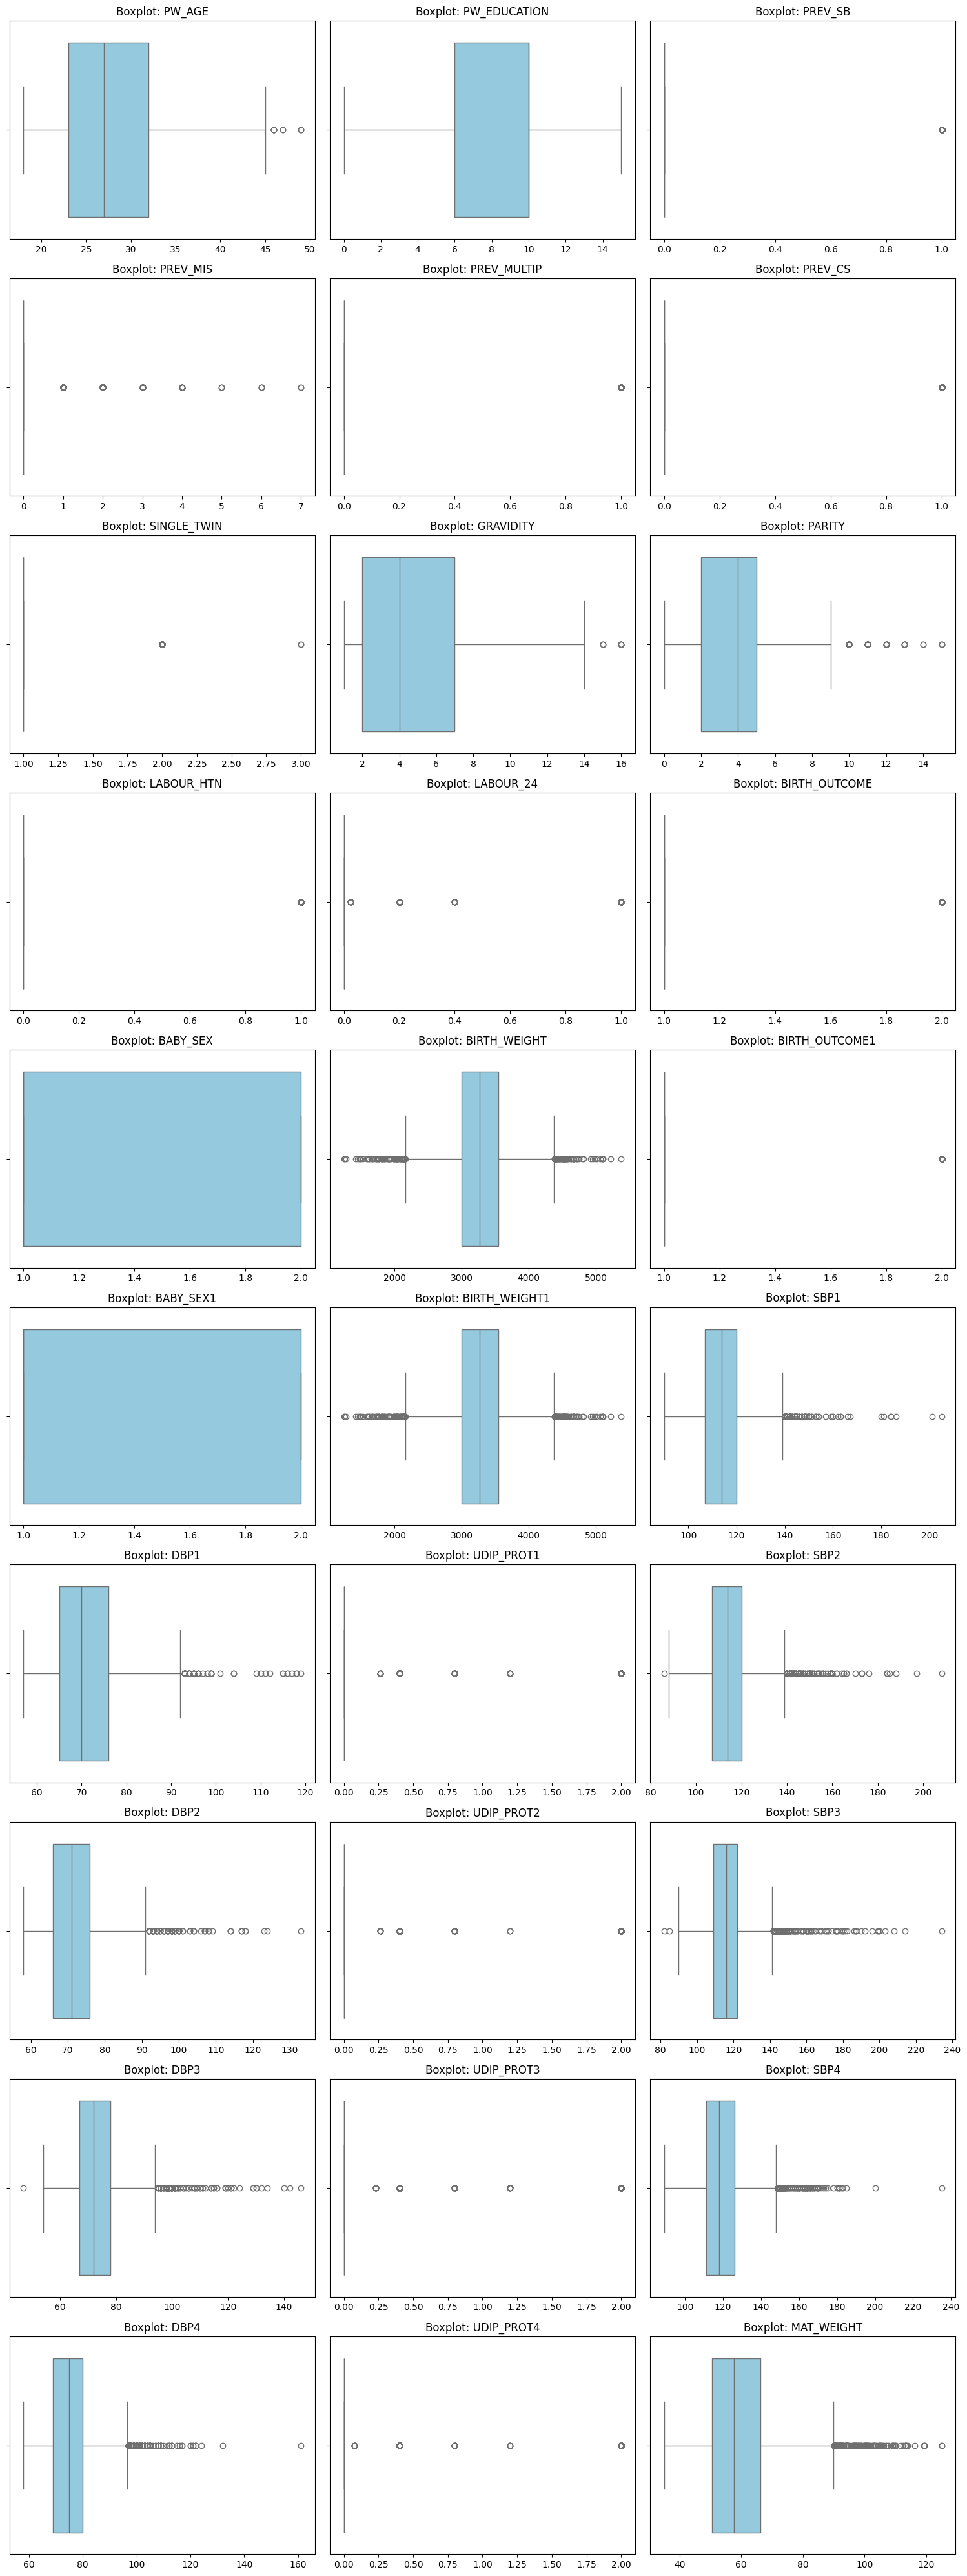

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set the number of rows and columns for subplots
n_cols = 3
n_rows = -(-len(numerical_columns) // n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f'Boxplot: {col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()


In [27]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1  # Interquartile Range

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR


df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [28]:
df.shape

(4359, 33)

## Categorical encoding

In [29]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: Index(['WEALTH_INDEX', 'BABY_ID1', 'TYPEDELIV'], dtype='object')


In [30]:
df = pd.get_dummies(df, columns=['TYPEDELIV', 'WEALTH_INDEX'], drop_first=False)

df.head()


,PW_AGE,PW_EDUCATION,PREV_SB,PREV_MIS,PREV_MULTIP,PREV_CS,SINGLE_TWIN,GRAVIDITY,PARITY,LABOUR_HTN,...,MAT_WEIGHT,TYPEDELIV_Assisted delivery eg Forceps or vacuum,TYPEDELIV_Caesarean Section,TYPEDELIV_Normally through the vagina,WEALTH_INDEX_Don't know,WEALTH_INDEX_Middle,WEALTH_INDEX_Poor,WEALTH_INDEX_Poorest,WEALTH_INDEX_Rich,WEALTH_INDEX_Richest
0,36.0,10.0,1,2,1,0,1,8.0,3.0,0,...,45.80,False,False,True,False,True,False,False,False,False
1,32.0,10.0,0,0,0,0,1,4.0,3.0,0,...,57.34,False,False,True,False,False,True,False,False,False
2,18.0,6.0,0,1,0,0,1,3.0,1.0,0,...,68.00,False,False,True,False,True,False,False,False,False
3,30.0,6.0,1,0,0,0,1,8.0,6.0,0,...,57.60,False,False,True,False,False,True,False,False,False
4,22.0,10.0,0,0,0,0,1,1.0,2.8,0,...,71.58,False,False,True,False,False,False,False,False,True


In [31]:
df['PREV_CS'].isnull().sum()

0

In [32]:
df.drop(columns=['BABY_ID1','outlier'], inplace=True, errors='ignore')

## Correlation analysis

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

target_corr = correlation_matrix[['LABOUR_HTN']].sort_values(by='LABOUR_HTN', ascending=False)

print("Correlation of Features with Target Variable (LABOUR_HTN):")
print(target_corr)


Correlation of Features with Target Variable (LABOUR_HTN):
                                                  LABOUR_HTN
LABOUR_HTN                                          1.000000
SBP4                                                0.192787
DBP3                                                0.173776
DBP4                                                0.172807
SBP3                                                0.168575
SBP2                                                0.149909
DBP2                                                0.142383
SBP1                                                0.109601
TYPEDELIV_Caesarean Section                         0.101394
LABOUR_24                                           0.100063
DBP1                                                0.097130
PREV_SB                                             0.072667
UDIP_PROT4                                          0.071446
PREV_CS                                             0.071313
BIRTH_OUTCOME             

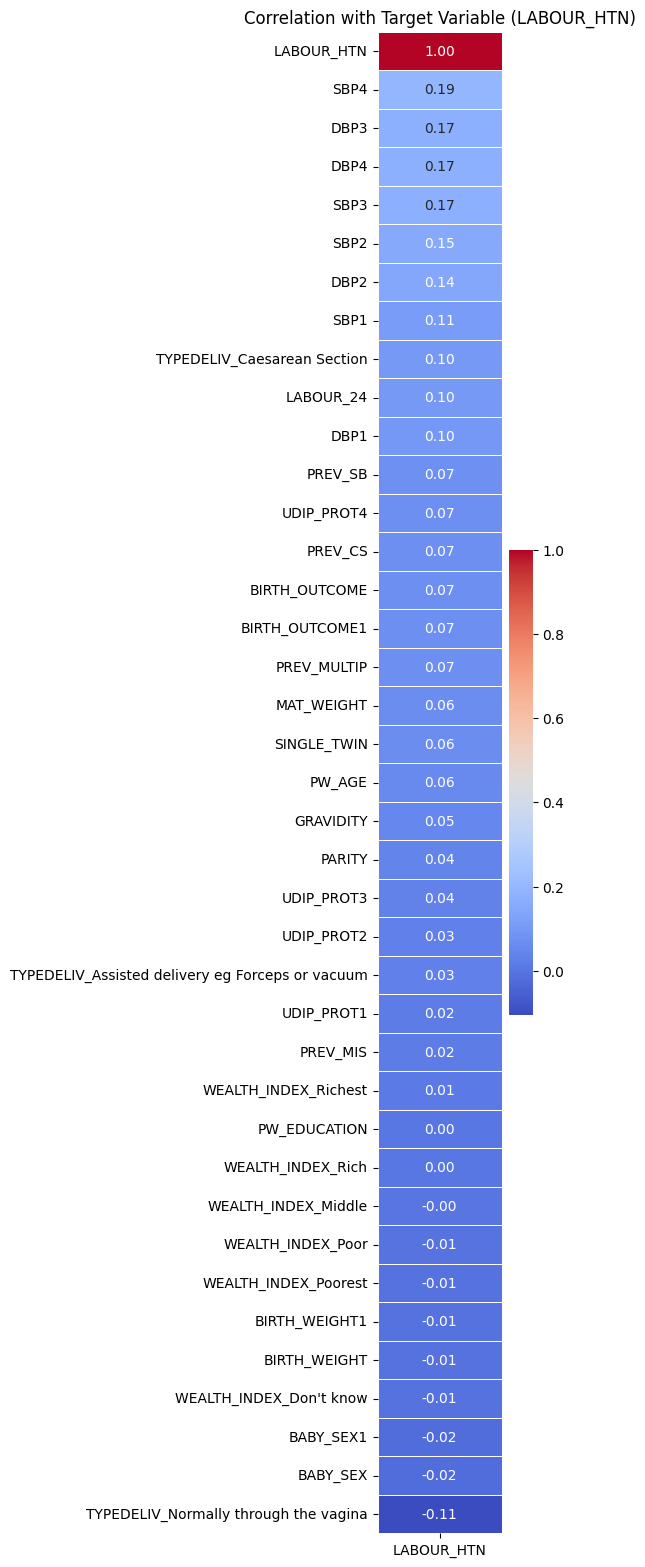

In [34]:
# Plot heatmap for correlation with the target variable
plt.figure(figsize=(2, len(target_corr) * 0.5))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation with Target Variable (LABOUR_HTN)')
plt.show()


##Target Variable

In [35]:
df['LABOUR_HTN'].value_counts()

,count
LABOUR_HTN,
0,4257
1,102


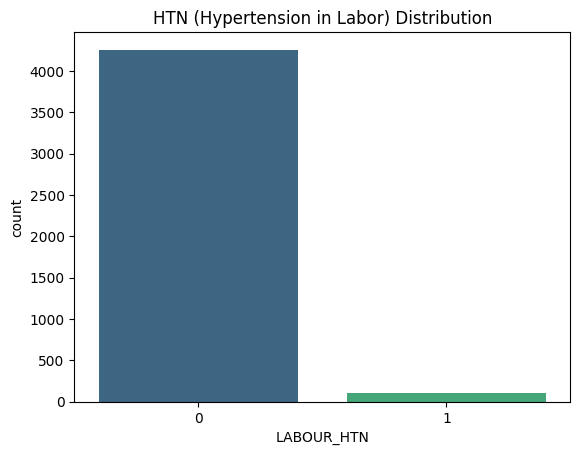

In [36]:
sns.countplot(data=df, x='LABOUR_HTN', palette='viridis')
plt.title("HTN (Hypertension in Labor) Distribution")
plt.show()


In [37]:
# Save the dataset to a CSV file
df.to_csv("df.csv", index=False)

# Confirm that the dataset has been saved
print("Dataset has been saved as 'saved_dataset.csv'.")


Dataset has been saved as 'saved_dataset.csv'.


# Model

In [38]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt


In [39]:

selected_features = ["SBP4", "DBP3", "SBP3", "DBP4", "SBP2", "DBP2",
    "TYPEDELIV_Caesarean Section", "SBP1", "DBP1",
    "TYPEDELIV_Assisted delivery eg Forceps or vacuum",
    "BIRTH_OUTCOME1", "BIRTH_OUTCOME", "MAT_WEIGHT",
    "LABOUR_24", "SINGLE_TWIN", "PREV_SB"]


X = df[selected_features]
y = df['LABOUR_HTN']


## Split and class imbalance

In [40]:
from sklearn.model_selection import train_test_split

# Step 1: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Outputs: X_train, X_test, y_train, y_test
print(f"Train set: {len(X_train)}")
print(f"Test set: {len(X_test)}")


Train set: 3487
Test set: 872


In [41]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt

# Initialize Borderline-SMOTE
sampler = BorderlineSMOTE(random_state=42)

# Apply Borderline-SMOTE on the training set only
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)




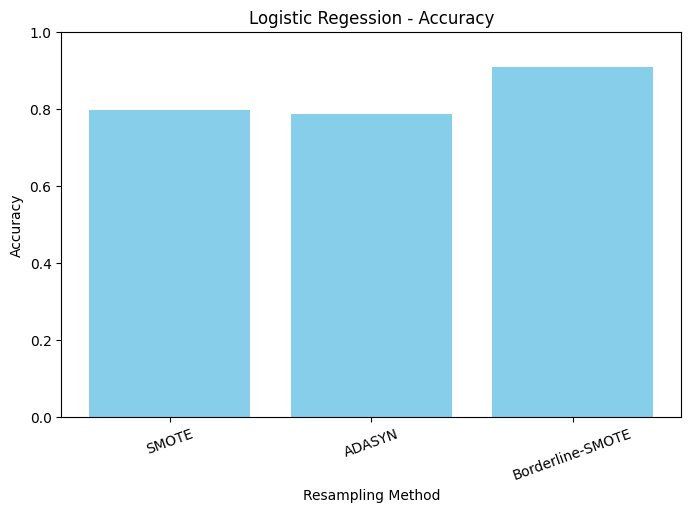

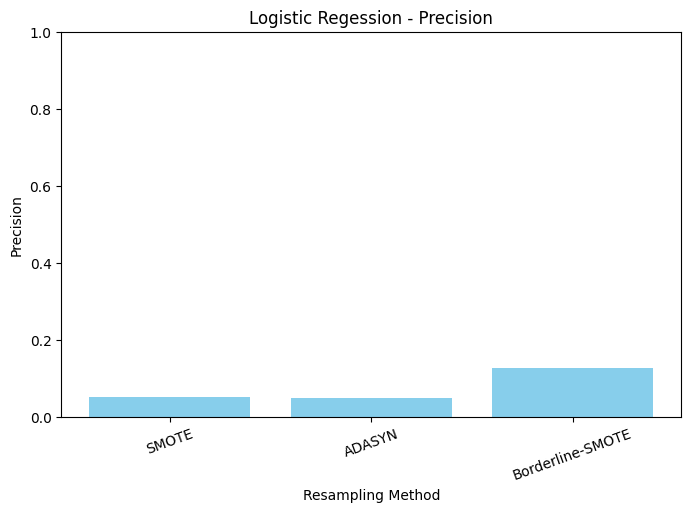

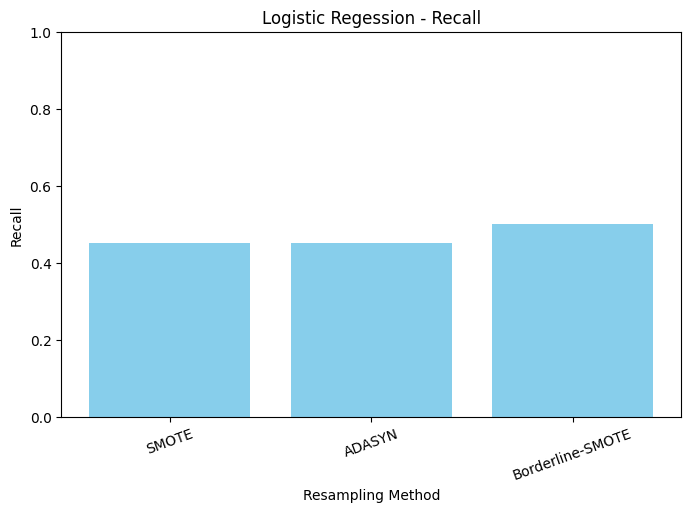

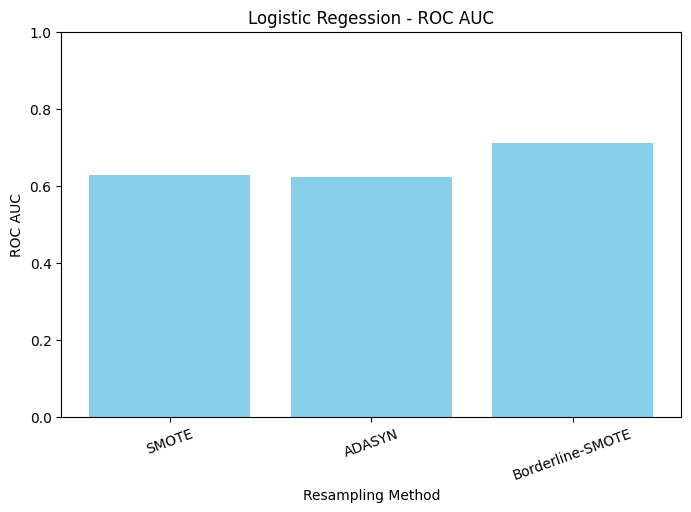

In [66]:
from imblearn.over_sampling import BorderlineSMOTE, SMOTE, ADASYN, KMeansSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize different resampling techniques
samplers = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "Borderline-SMOTE": BorderlineSMOTE(random_state=42),
    # "Cluster-Based SMOTE": KMeansSMOTE(random_state=42)
}

# Dictionary to store results
results = {}

# Apply each resampling technique and train Logistic Regression
for name, sampler in samplers.items():
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    # Train logistic regression
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_resampled, y_resampled)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_pred)

    # Store results
    results[name] = [accuracy, precision, recall, roc_auc]

# Convert results to numpy array for plotting
metrics = ["Accuracy", "Precision", "Recall", "ROC AUC"]
results_array = np.array(list(results.values()))

# Plot bar graphs
for i, metric in enumerate(metrics):
    plt.figure(figsize=(8, 5))
    plt.bar(results.keys(), results_array[:, i], color='skyblue')
    plt.xlabel("Resampling Method")
    plt.ylabel(metric)
    plt.title(f"Logistic Regession - {metric}")
    plt.xticks(rotation=20)
    plt.ylim(0, 1)  # Since these are scores between 0 and 1
    plt.show()


# Decision Tree

## Decision tree with Borderline-smote


=== Evaluation Results with Borderline-SMOTE ===
Train - Accuracy: 0.97, Precision: 0.41, Recall: 0.65, ROC AUC: 0.97
Test - Accuracy: 0.96, Precision: 0.19, Recall: 0.25, ROC AUC: 0.63


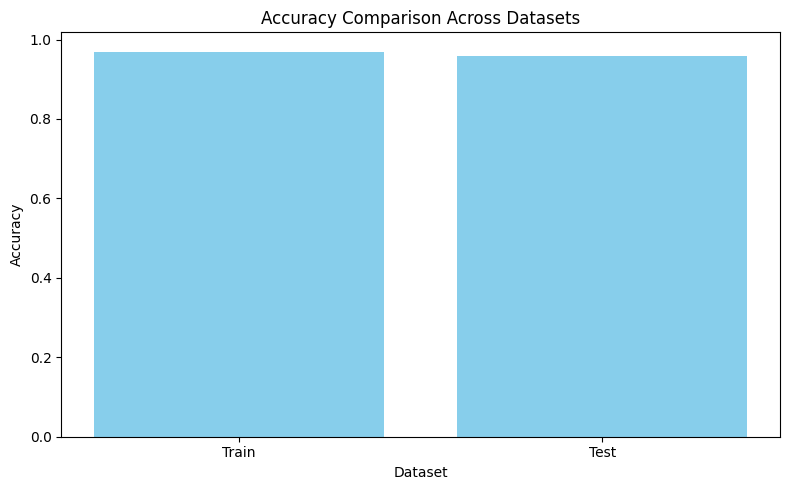

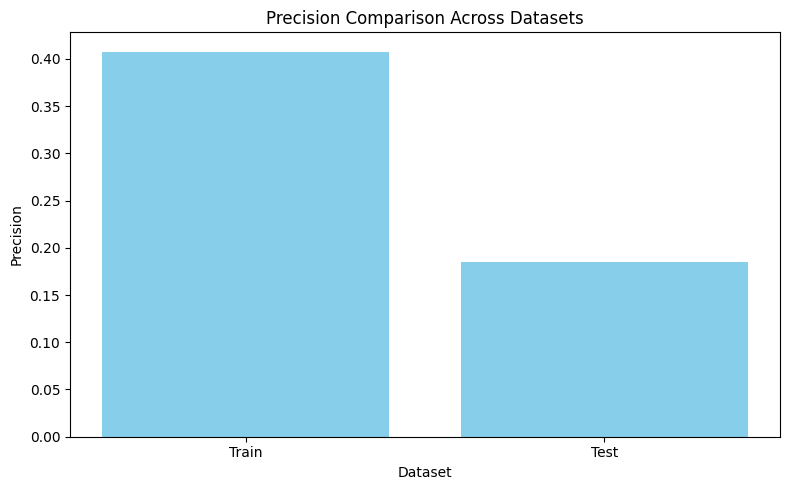

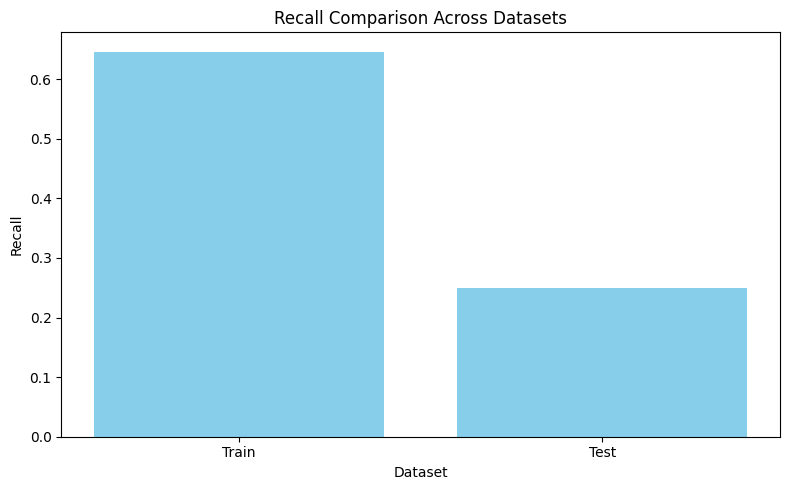

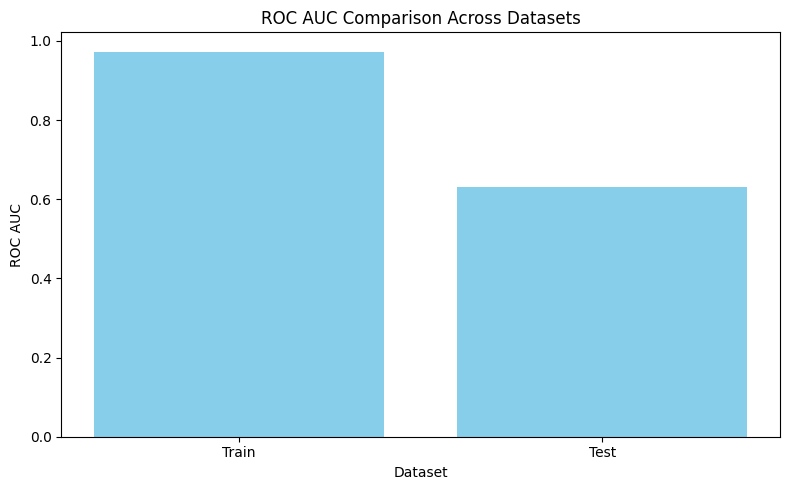

In [42]:
# Train a Decision Tree classifier on the resampled training set
model = DecisionTreeClassifier(
    class_weight="balanced",  # Adjust class weights automatically
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Initialize results dictionary
results = {}

# Define a function to evaluate the model
def evaluate_model(X, y, dataset_name):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]

    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred_proba)

    results[dataset_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "ROC AUC": roc_auc
    }

    print(
        f"{dataset_name} - Accuracy: {accuracy:.2f}, "
        f"Precision: {precision:.2f}, Recall: {recall:.2f}, ROC AUC: {roc_auc:.2f}"
    )

# Evaluate on training and test sets
print("\n=== Evaluation Results with Borderline-SMOTE ===")
evaluate_model(X_train, y_train, "Train")
evaluate_model(X_test, y_test, "Test")

# Visualization for Train and Test Results
metrics = ["Accuracy", "Precision", "Recall", "ROC AUC"]
for metric in metrics:
    plt.figure(figsize=(8, 5))
    values = [results[dataset][metric] for dataset in results]
    plt.bar(results.keys(), values, color='skyblue')
    plt.title(f"{metric} Comparison Across Datasets")
    plt.ylabel(metric)
    plt.xlabel("Dataset")
    plt.tight_layout()
    plt.show()


## Pruning

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Step 1: Train a Decision Tree Model First
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_resampled, y_train_resampled)

# Step 2: Find Best ccp_alpha for Pruning
path = tree_model.cost_complexity_pruning_path(X_train_resampled, y_train_resampled)
ccp_alphas = path.ccp_alphas[:-1]  # Exclude the last value (overly pruned)

# Step 3: Train multiple models with different ccp_alpha values
scores = []
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    model.fit(X_train_resampled, y_train_resampled)
    scores.append(cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc').mean())

# Step 4: Select the Best ccp_alpha
best_alpha = ccp_alphas[np.argmax(scores)]
print(f"Best ccp_alpha: {best_alpha}")

# Step 5: Retrain Decision Tree with Best Pruning Value
pruned_tree_model = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
pruned_tree_model.fit(X_train_resampled, y_train_resampled)


Best ccp_alpha: 0.0006959451971296374


DecisionTreeClassifier(ccp_alpha=0.0006959451971296374, random_state=42)

## After tree pruning

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Step 1: Retrain Pruned Decision Tree with Additional Constraints
pruned_tree_model = DecisionTreeClassifier(
    ccp_alpha=0.0006959451971296374,  # Best pruning value
    class_weight="balanced",          # Handle class imbalance
    max_depth=10,                     # Limit tree depth to reduce overfitting
    min_samples_split=5,               # Require at least 5 samples to split
    min_samples_leaf=3,                # Require at least 3 samples per leaf
    random_state=42
)
pruned_tree_model.fit(X_train_resampled, y_train_resampled)

# Step 2: Predict on Train & Test Sets
y_train_pred = pruned_tree_model.predict(X_train_resampled)
y_test_pred = pruned_tree_model.predict(X_test)

# Step 3: Evaluate the Model
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train_resampled, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train_resampled, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_roc_auc = roc_auc_score(y_train_resampled, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Step 4: Print Results
print(f"=== Evaluation Results with Pruned & Balanced Decision Tree ===")
print(f"Train - Accuracy: {train_accuracy:.2f}, Precision: {train_precision:.2f}, Recall: {train_recall:.2f}, ROC AUC: {train_roc_auc:.2f}")
print(f"Test  - Accuracy: {test_accuracy:.2f}, Precision: {test_precision:.2f}, Recall: {test_recall:.2f}, ROC AUC: {test_roc_auc:.2f}")


=== Evaluation Results with Pruned & Balanced Decision Tree ===
Train - Accuracy: 0.98, Precision: 0.97, Recall: 0.98, ROC AUC: 0.98
Test  - Accuracy: 0.96, Precision: 0.23, Recall: 0.35, ROC AUC: 0.66


## hyperparameter tuning with boderline-smote

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Step 1: Define parameter grid for tuning
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Step 2: Perform Grid Search on Pruned Model
grid_search = GridSearchCV(
    DecisionTreeClassifier(ccp_alpha=0.0006959451971296374, class_weight="balanced", random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train_resampled, y_train_resampled)

# Step 3: Get the Best Parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Step 4: Train Final Model with Best Parameters
final_tree_model = DecisionTreeClassifier(
    ccp_alpha=0.0006959451971296374,  # Keep the best pruning value
    class_weight="balanced",
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
final_tree_model.fit(X_train_resampled, y_train_resampled)

# Step 5: Evaluate on Test Data
y_test_pred = final_tree_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

print(f"=== Final Model Evaluation After Tuning ===")
print(f"Test - Accuracy: {test_accuracy:.2f}, Precision: {test_precision:.2f}, Recall: {test_recall:.2f}, ROC AUC: {test_roc_auc:.2f}")


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
=== Final Model Evaluation After Tuning ===
Test - Accuracy: 0.96, Precision: 0.22, Recall: 0.30, ROC AUC: 0.64


#Random forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Step 1: Train a Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    class_weight={0: 1, 1: 5},  # Increase weight for minority class
    random_state=42,
    n_jobs=-1               # Use all CPU cores
)
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 2: Predict on Train & Test Sets
y_train_pred = rf_model.predict(X_train_resampled)
y_test_pred = rf_model.predict(X_test)

# Step 3: Evaluate the Model
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train_resampled, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train_resampled, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_roc_auc = roc_auc_score(y_train_resampled, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Step 4: Print Results
print(f"=== Evaluation Results for Random Forest ===")
print(f"Train - Accuracy: {train_accuracy:.2f}, Precision: {train_precision:.2f}, Recall: {train_recall:.2f}, ROC AUC: {train_roc_auc:.2f}")
print(f"Test  - Accuracy: {test_accuracy:.2f}, Precision: {test_precision:.2f}, Recall: {test_recall:.2f}, ROC AUC: {test_roc_auc:.2f}")


=== Evaluation Results for Random Forest ===
Train - Accuracy: 0.98, Precision: 0.97, Recall: 1.00, ROC AUC: 0.98
Test  - Accuracy: 0.95, Precision: 0.18, Recall: 0.30, ROC AUC: 0.63


## Random forest Hyperparameter tuning

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [7, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

grid_search = GridSearchCV(
    RandomForestClassifier(class_weight="balanced", random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train_resampled, y_train_resampled)

# Train the best model
best_params = grid_search.best_params_
rf_model = RandomForestClassifier(**best_params, class_weight="balanced", random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

print(f"Best Parameters: {best_params}")


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Prediction with optimized parameter(Random Forest)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Step 1: Train Random Forest with Best Parameters
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,  # Reduce tree depth
    min_samples_split=2,  # Require more samples to split
    min_samples_leaf=1,  # Ensure minimum samples per leaf
    class_weight="balanced",  # Handle class imbalance
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 2: Predict on Train & Test Sets
y_train_pred = rf_model.predict(X_train_resampled)
y_test_pred = rf_model.predict(X_test)

# Step 3: Evaluate the Model
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train_resampled, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train_resampled, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_roc_auc = roc_auc_score(y_train_resampled, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Step 4: Print Results
print(f"=== Evaluation Results for Optimized Random Forest ===")
print(f"Train - Accuracy: {train_accuracy:.2f}, Precision: {train_precision:.2f}, Recall: {train_recall:.2f}, ROC AUC: {train_roc_auc:.2f}")
print(f"Test  - Accuracy: {test_accuracy:.2f}, Precision: {test_precision:.2f}, Recall: {test_recall:.2f}, ROC AUC: {test_roc_auc:.2f}")


=== Evaluation Results for Optimized Random Forest ===
Train - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, ROC AUC: 1.00
Test  - Accuracy: 0.98, Precision: 0.50, Recall: 0.20, ROC AUC: 0.60


# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt

# Train Logistic Regression Model
model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced',
    solver='liblinear',
    C=0.5,
    penalty='l2'
)
model.fit(X_train_resampled, y_train_resampled)

# Evaluate on Training Set
y_train_pred = model.predict(X_train_resampled)
y_train_pred_proba = model.predict_proba(X_train_resampled)[:, 1]

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
train_roc_auc = roc_auc_score(y_train_resampled, y_train_pred_proba)

# Evaluate on Test Set
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Print Results
print("\nTraining Set Metrics:")
print(f"Accuracy: {train_accuracy:.2f}, Precision: {train_precision:.2f}, Recall: {train_recall:.2f}, ROC AUC: {train_roc_auc:.2f}")

print("\nTesting Set Metrics:")
print(f"Accuracy: {test_accuracy:.2f}, Precision: {test_precision:.2f}, Recall: {test_recall:.2f}, ROC AUC: {test_roc_auc:.2f}")

# # Visualize Results for Train and Test Sets
# metrics = ["Accuracy", "Precision", "Recall", "ROC AUC"]
# datasets = ["Train", "Test"]
# scores = {
#     "Train": [train_accuracy, train_precision, train_recall, train_roc_auc],
#     "Test": [test_accuracy, test_precision, test_recall, test_roc_auc],
# }

# for metric_idx, metric_name in enumerate(metrics):
#     plt.figure(figsize=(8, 5))
#     values = [scores[dataset][metric_idx] for dataset in datasets]
#     plt.bar(datasets, values, color='lightcoral')
#     plt.title(f"{metric_name} Comparison Across Datasets")
#     plt.ylabel(metric_name)
#     plt.xlabel("Datasets")
#     plt.tight_layout()
#     plt.show()



Training Set Metrics:
Accuracy: 0.89, Precision: 0.90, Recall: 0.87, ROC AUC: 0.91

Testing Set Metrics:
Accuracy: 0.90, Precision: 0.09, Recall: 0.35, ROC AUC: 0.68


# LightGBM

In [50]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt

# LightGBM model
model = LGBMClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Learning rate
    max_depth=-1,  # No max depth restriction
    reg_alpha=0.1,  # L1 regularization
    reg_lambda=0.1,  # L2 regularization
)

# Train the model
model.fit(X_train_resampled, y_train_resampled)

# Evaluate on Training Set
y_train_pred = model.predict(X_train_resampled)
y_train_pred_proba = model.predict_proba(X_train_resampled)[:, 1]

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
train_roc_auc = roc_auc_score(y_train_resampled, y_train_pred_proba)

# Evaluate on Test Set
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Print Evaluation Metrics for Train and Test Sets
print("\nTraining Set Metrics:")
print(f"Accuracy: {train_accuracy:.2f}, Precision: {train_precision:.2f}, Recall: {train_recall:.2f}, ROC AUC: {train_roc_auc:.2f}")

print("\nTesting Set Metrics:")
print(f"Accuracy: {test_accuracy:.2f}, Precision: {test_precision:.2f}, Recall: {test_recall:.2f}, ROC AUC: {test_roc_auc:.2f}")

# # Visualize Results for Train and Test Sets
# metrics = ["Accuracy", "Precision", "Recall", "ROC AUC"]
# datasets = ["Train", "Test"]
# scores = {
#     "Train": [train_accuracy, train_precision, train_recall, train_roc_auc],
#     "Test": [test_accuracy, test_precision, test_recall, test_roc_auc],
# }

# for metric_idx, metric_name in enumerate(metrics):
#     plt.figure(figsize=(8, 5))
#     values = [scores[dataset][metric_idx] for dataset in datasets]
#     plt.bar(datasets, values, color='lightgreen')
#     plt.title(f"{metric_name} Comparison Across Datasets")
#     plt.ylabel(metric_name)
#     plt.xlabel("Datasets")
#     plt.tight_layout()
#     plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Training Set Metrics:
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, ROC AUC: 1.00

Testing Set Metrics:
Accuracy: 0.97, Precision: 0.33, Recall: 0.20, ROC AUC: 0.80


In [51]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.0 MB/s eta 0:00:00


In [52]:
!pip install lightgbm


## Hyperparameter tuning for LGBM with optuna

In [53]:
import optuna

def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 40),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.01, 1),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.01, 1),
        'class_weight': 'balanced',
        'random_state': 42
    }

    model = LGBMClassifier(**params)
    model.fit(X_train_resampled, y_train_resampled)

    y_pred = model.predict(X_test)
    return recall_score(y_test, y_pred)  # Optimize for recall

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Best parameters
print("Best parameters:", study.best_params)


[I 2025-02-09 16:58:40,047] A new study created in memory with name: no-name-a7170ce4-ea81-4953-8247-b20f64d1b9bc


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-02-09 16:58:42,097] Trial 0 finished with value: 0.15 and parameters: {'num_leaves': 30, 'max_depth': 5, 'learning_rate': 0.0668931669478171, 'n_estimators': 888, 'reg_alpha': 0.059245247184680196, 'reg_lambda': 0.03467766837693289}. Best is trial 0 with value: 0.15.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-02-09 16:58:43,222] Trial 1 finished with value: 0.2 and parameters: {'num_leaves': 21, 'max_depth': 6, 'learning_rate': 0.04475032856842406, 'n_estimators': 587, 'reg_alpha': 0.03292942523562699, 'reg_lambda': 0.18274868319798418}. Best is trial 1 with value: 0.2.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-02-09 16:58:44,861] Trial 2 finished with value: 0.25 and parameters: {'num_leaves': 25, 'max_depth': 3, 'learning_rate': 0.03229969829961492, 'n_estimators': 716, 'reg_alpha': 0.641940926556874, 'reg_lambda': 0.11007132993526432}. Best is trial 2 with value: 0.25.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2025-02-09 16:58:51,880] Trial 3 finished with value: 0.2 and parameters: {'num_leaves': 37, 'max_depth': 10, 'learning_rate': 0.018943961273109624, 'n_estimators': 840, 'reg_alpha': 0.010010269335624997, 'reg_lambda': 0.632302749278887}. Best is trial 2 with value: 0.25.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2025-02-09 16:58:53,976] Trial 4 finished with value: 0.35 and parameters: {'num_leaves': 30, 'max_depth': 6, 'learning_rate': 0.01894386168195449, 'n_estimators': 165, 'reg_alpha': 0.06937097580831508, 'reg_lambda': 0.04456346944415215}. Best is trial 4 with value: 0.35.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-02-09 16:58:58,416] Trial 5 finished with value: 0.2 and parameters: {'num_leaves': 30, 'max_depth': 8, 'learning_rate': 0.013255784118609414, 'n_estimators': 706, 'reg_alpha': 0.18688310192136348, 'reg_lambda': 0.2938769840867707}. Best is trial 4 with value: 0.35.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-02-09 16:59:01,611] Trial 6 finished with value: 0.2 and parameters: {'num_leaves': 24, 'max_depth': 10, 'learning_rate': 0.04446258605975624, 'n_estimators': 858, 'reg_alpha': 0.04139307452524963, 'reg_lambda': 0.04746404916896233}. Best is trial 4 with value: 0.35.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[I 2025-02-09 16:59:04,946] Trial 7 finished with value: 0.2 and parameters: {'num_leaves': 33, 'max_depth': 10, 'learning_rate': 0.016388584169488272, 'n_estimators': 765, 'reg_alpha': 0.0316866355476749, 'reg_lambda': 0.018704227257567048}. Best is trial 4 with value: 0.35.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-02-09 16:59:07,003] Trial 8 finished with value: 0.25 and parameters: {'num_leaves': 33, 'max_depth': 4, 'learning_rate': 0.012847946531789342, 'n_estimators': 781, 'reg_alpha': 0.0575556619776925, 'reg_lambda': 0.16887399719190696}. Best is trial 4 with value: 0.35.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2025-02-09 16:59:12,453] Trial 9 finished with value: 0.2 and parameters: {'num_leaves': 38, 'max_depth': 10, 'learning_rate': 0.010789150870502164, 'n_estimators': 490, 'reg_alpha': 0.017656308277468075, 'reg_lambda': 0.022190826179074186}. Best is trial 4 with value: 0.35.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2025-02-09 16:59:13,491] Trial 10 finished with value: 0.4 and parameters: {'num_leaves': 28, 'max_depth': 7, 'learning_rate': 0.022970498986163046, 'n_estimators': 135, 'reg_alpha': 0.18749161112441975, 'reg_lambda': 0.010714005953730815}. Best is trial 10 with value: 0.4.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2025-02-09 16:59:14,201] Trial 11 finished with value: 0.45 and parameters: {'num_leaves': 26, 'max_depth': 7, 'learning_rate': 0.023904670748495786, 'n_estimators': 106, 'reg_alpha': 0.19454792354064096, 'reg_lambda': 0.011183549786918863}. Best is trial 11 with value: 0.45.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2025-02-09 16:59:14,813] Trial 12 finished with value: 0.4 and parameters: {'num_leaves': 26, 'max_depth': 8, 'learning_rate': 0.028349822107433878, 'n_estimators': 102, 'reg_alpha': 0.1929984987653326, 'reg_lambda': 0.010534664090110274}. Best is trial 11 with value: 0.45.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-02-09 16:59:16,410] Trial 13 finished with value: 0.2 and parameters: {'num_leaves': 27, 'max_depth': 8, 'learning_rate': 0.025036981746723364, 'n_estimators': 299, 'reg_alpha': 0.4674850467763087, 'reg_lambda': 0.010485600630287674}. Best is trial 11 with value: 0.45.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[I 2025-02-09 16:59:18,138] Trial 14 finished with value: 0.2 and parameters: {'num_leaves': 23, 'max_depth': 7, 'learning_rate': 0.03870120884197691, 'n_estimators': 292, 'reg_alpha': 0.17409931831787018, 'reg_lambda': 0.018502736712598}. Best is trial 11 with value: 0.45.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[I 2025-02-09 16:59:20,175] Trial 15 finished with value: 0.2 and parameters: {'num_leaves': 28, 'max_depth': 7, 'learning_rate': 0.0837725589853057, 'n_estimators': 301, 'reg_alpha': 0.37681275543824627, 'reg_lambda': 0.05926814418189288}. Best is trial 11 with value: 0.45.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-02-09 16:59:23,543] Trial 16 finished with value: 0.2 and parameters: {'num_leaves': 20, 'max_depth': 5, 'learning_rate': 0.02549257674803941, 'n_estimators': 999, 'reg_alpha': 0.13224588736430357, 'reg_lambda': 0.010260318526494722}. Best is trial 11 with value: 0.45.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[I 2025-02-09 16:59:28,218] Trial 17 finished with value: 0.2 and parameters: {'num_leaves': 34, 'max_depth': 9, 'learning_rate': 0.021504555538421264, 'n_estimators': 424, 'reg_alpha': 0.2835816431691534, 'reg_lambda': 0.029658737146957253}. Best is trial 11 with value: 0.45.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-02-09 16:59:30,000] Trial 18 finished with value: 0.2 and parameters: {'num_leaves': 22, 'max_depth': 7, 'learning_rate': 0.057966651975989915, 'n_estimators': 220, 'reg_alpha': 0.9892275191449483, 'reg_lambda': 0.0644644731361497}. Best is trial 11 with value: 0.45.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[I 2025-02-09 16:59:31,168] Trial 19 finished with value: 0.2 and parameters: {'num_leaves': 28, 'max_depth': 5, 'learning_rate': 0.03256218793862497, 'n_estimators': 390, 'reg_alpha': 0.2855076386187041, 'reg_lambda': 0.01733575901963525}. Best is trial 11 with value: 0.45.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-02-09 16:59:31,575] Trial 20 finished with value: 0.4 and parameters: {'num_leaves': 35, 'max_depth': 6, 'learning_rate': 0.015539074991416584, 'n_estimators': 155, 'reg_alpha': 0.11696241775029238, 'reg_lambda': 0.9365431470064752}. Best is trial 11 with value: 0.45.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-09 16:59:31,896] Trial 21 finished with value: 0.3 and parameters: {'num_leaves': 26, 'max_depth': 8, 'learning_rate': 0.025769905671255516, 'n_estimators': 134, 'reg_alpha': 0.20909489841651108, 'reg_lambda': 0.01042636586417212}. Best is trial 11 with value: 0.45.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2025-02-09 16:59:32,162] Trial 22 finished with value: 0.45 and parameters: {'num_leaves': 25, 'max_depth': 9, 'learning_rate': 0.027790335236616857, 'n_estimators': 101, 'reg_alpha': 0.08253804730733277, 'reg_lambda': 0.014072154351404563}. Best is trial 11 with value: 0.45.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2025-02-09 16:59:32,622] Trial 23 finished with value: 0.2 and parameters: {'num_leaves': 24, 'max_depth': 9, 'learning_rate': 0.036763925666001146, 'n_estimators': 218, 'reg_alpha': 0.08271999840429384, 'reg_lambda': 0.015700619816592237}. Best is trial 11 with value: 0.45.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2025-02-09 16:59:33,135] Trial 24 finished with value: 0.2 and parameters: {'num_leaves': 28, 'max_depth': 9, 'learning_rate': 0.021422408418886072, 'n_estimators': 231, 'reg_alpha': 0.1097561248342303, 'reg_lambda': 0.02794776010351696}. Best is trial 11 with value: 0.45.
[I 2025-02-09 16:59:33,397] Trial 25 finished with value: 0.45 and parameters: {'num_leaves': 31, 'max_depth': 7, 'learning_rate': 0.020828143381547686, 'n_estimators': 101, 'reg_alpha': 0.2884534927360969, 'reg_lambda': 0.014409924582737777}. Best is trial 11 with value: 0.45.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] 

[I 2025-02-09 16:59:34,220] Trial 26 finished with value: 0.2 and parameters: {'num_leaves': 32, 'max_depth': 9, 'learning_rate': 0.017366411348908407, 'n_estimators': 351, 'reg_alpha': 0.5440918596655003, 'reg_lambda': 0.015317171460394702}. Best is trial 11 with value: 0.45.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Foun

[I 2025-02-09 16:59:35,133] Trial 27 finished with value: 0.2 and parameters: {'num_leaves': 40, 'max_depth': 8, 'learning_rate': 0.029188009163381694, 'n_estimators': 213, 'reg_alpha': 0.31930088194933715, 'reg_lambda': 0.02773333643098783}. Best is trial 11 with value: 0.45.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-02-09 16:59:35,799] Trial 28 finished with value: 0.2 and parameters: {'num_leaves': 31, 'max_depth': 6, 'learning_rate': 0.052575786547764576, 'n_estimators': 100, 'reg_alpha': 0.1442121744246269, 'reg_lambda': 0.022397537535497124}. Best is trial 11 with value: 0.45.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-02-09 16:59:37,888] Trial 29 finished with value: 0.25 and parameters: {'num_leaves': 29, 'max_depth': 5, 'learning_rate': 0.013251264517622157, 'n_estimators': 474, 'reg_alpha': 0.8205048335630883, 'reg_lambda': 0.038389126168447044}. Best is trial 11 with value: 0.45.


Best parameters: {'num_leaves': 26, 'max_depth': 7, 'learning_rate': 0.023904670748495786, 'n_estimators': 106, 'reg_alpha': 0.19454792354064096, 'reg_lambda': 0.011183549786918863}


In [54]:
model = LGBMClassifier(
    num_leaves = 34,
    max_depth= 3,
    learning_rate= 0.010111341400140444,
    n_estimators= 764,
    reg_alpha= 0.0411997885785947,
    reg_lambda= 0.010461909585077636,
    class_weight='balanced',
    random_state=42
)

# Train the model
model.fit(X_train_resampled, y_train_resampled)

# Evaluate on Training Set
y_train_pred = model.predict(X_train_resampled)
y_train_pred_proba = model.predict_proba(X_train_resampled)[:, 1]

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
train_roc_auc = roc_auc_score(y_train_resampled, y_train_pred_proba)

# Evaluate on Test Set
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Print Evaluation Metrics for Train and Test Sets
print("\nTraining Set Metrics:")
print(f"Accuracy: {train_accuracy:.2f}, Precision: {train_precision:.2f}, Recall: {train_recall:.2f}, ROC AUC: {train_roc_auc:.2f}")

print("\nTesting Set Metrics:")
print(f"Accuracy: {test_accuracy:.2f}, Precision: {test_precision:.2f}, Recall: {test_recall:.2f}, ROC AUC: {test_roc_auc:.2f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

# Stacking model with base model and meta learner

In [67]:
# Install LightGBM if not installed (Uncomment below line if needed)
# !pip install lightgbm

# Import required libraries
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split


# Split into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply Borderline-SMOTE on the training set only (if needed)
from imblearn.over_sampling import BorderlineSMOTE
sampler = BorderlineSMOTE(random_state=42)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)

# Define base models
base_models = [
    ('lgbm', LGBMClassifier(
        num_leaves=34,
        max_depth=3,
        learning_rate=0.010111341400140444,
        n_estimators=764,
        reg_alpha=0.0411997885785947,
        reg_lambda=0.010461909585077636,
        class_weight='balanced',
        random_state=42
    )),
    ('logistic', LogisticRegression(
        random_state=42,
        max_iter=1000,
        class_weight='balanced',
        solver='liblinear',
        C=0.5,
        penalty='l2'
    )),
    ('random_forest', RandomForestClassifier(
        n_estimators=100,
        max_depth=15,
        min_samples_split=2,
        min_samples_leaf=1,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )),
    ('decision_tree', DecisionTreeClassifier(
        ccp_alpha=0.0006959451971296374,
        class_weight="balanced",
        max_depth=20,
        min_samples_split=2,
        min_samples_leaf=5,
        random_state=42
    ))
]

# Define meta-model (final model)
meta_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced',
    solver='liblinear',
    C=0.5,
    penalty='l2'
)

# Create Stacking Classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    n_jobs=-1
)

# Train the ensemble model
stacking_model.fit(X_train_resampled, y_train_resampled)

# Predict on Train & Test Sets
y_train_pred = stacking_model.predict(X_train_resampled)
y_test_pred = stacking_model.predict(X_test)

# Evaluate the Model
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train_resampled, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train_resampled, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_roc_auc = roc_auc_score(y_train_resampled, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
# Print Results
print(f"=== Evaluation Results for Stacking Ensemble ===")
print(f"Train - Accuracy: {train_accuracy:.2f}, Precision: {train_precision:.2f}, Recall: {train_recall:.2f}, F1 Score: {train_f1:.2f}, ROC AUC: {train_roc_auc:.2f}")
print(f"Test  - Accuracy: {test_accuracy:.2f}, Precision: {test_precision:.2f}, Recall: {test_recall:.2f},F1 Score: {test_f1:.2f}, ROC AUC: {test_roc_auc:.2f}")
# Install LightGBM if not installed (Uncomment below line if needed)
# !pip install lightgbm


=== Evaluation Results for Stacking Ensemble ===
Train - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1 Score: 1.00, ROC AUC: 1.00
Test  - Accuracy: 0.97, Precision: 0.38, Recall: 0.15,F1 Score: 0.21, ROC AUC: 0.57


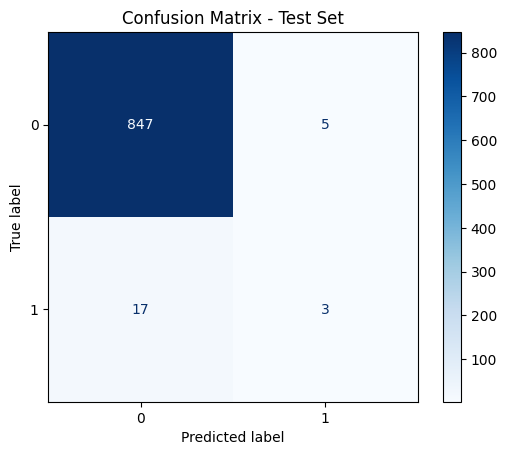

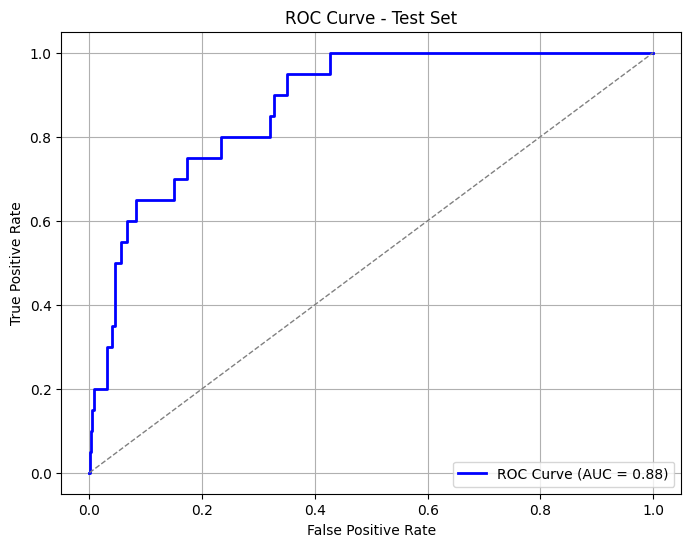

In [68]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

# Generate Confusion Matrix
test_cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=stacking_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()

# Generate ROC Curve
y_test_proba = stacking_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Test Set")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Ensemble with Voting classifier

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

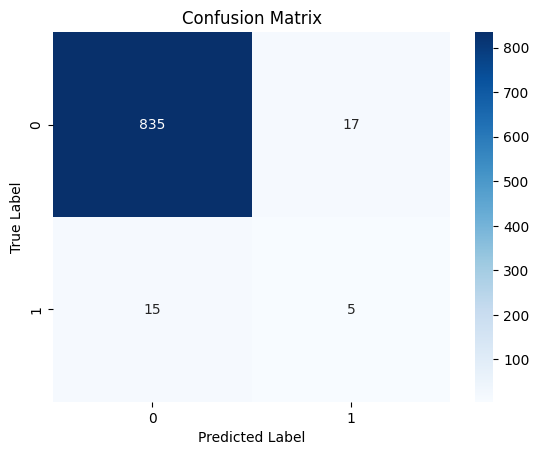

In [57]:
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Define individual models
lgbm_model = LGBMClassifier(
    num_leaves=34,
    max_depth=3,
    learning_rate=0.010111341400140444,
    n_estimators=764,
    reg_alpha=0.0411997885785947,
    reg_lambda=0.010461909585077636,
    class_weight='balanced',
    random_state=42
)

log_reg_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced',
    solver='liblinear',
    C=0.5,
    penalty='l2'
)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,  # Reduce tree depth
    min_samples_split=2,  # Require more samples to split
    min_samples_leaf=1,  # Ensure minimum samples per leaf
    class_weight="balanced",  # Handle class imbalance
    random_state=42,
    n_jobs=-1
)

final_tree_model = DecisionTreeClassifier(
    ccp_alpha=0.0006959451971296374,  # Keep the best pruning value
    class_weight="balanced",
    max_depth=20,  # From best hyperparameters
    min_samples_split=2,
    min_samples_leaf=5,
    random_state=42
)

# Create an ensemble using soft voting
ensemble_model = VotingClassifier(
    estimators=[
        ('lgbm', lgbm_model),
        ('log_reg', log_reg_model),
        ('rf', rf_model),
        ('dt', final_tree_model)
    ],
    voting='soft'  # Use probability-based voting
)

# Fit the ensemble model to training data
ensemble_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred = ensemble_model.predict(X_test)

# Evaluate model
train_accuracy = accuracy_score(y_train_resampled, ensemble_model.predict(X_train_resampled))
test_accuracy = accuracy_score(y_test, y_pred)
train_precision = precision_score(y_train_resampled, ensemble_model.predict(X_train_resampled), average='macro')
test_precision = precision_score(y_test, y_pred, average='macro')
train_recall = recall_score(y_train_resampled, ensemble_model.predict(X_train_resampled), average='macro')
test_recall = recall_score(y_test, y_pred, average='macro')
train_f1 = f1_score(y_train_resampled, ensemble_model.predict(X_train_resampled), average='macro')
test_f1 = f1_score(y_test, y_pred, average='macro')

print("=== Evaluation Results for Voting Ensemble ===")
print(f"Train - Accuracy: {train_accuracy:.2f}, Precision: {train_precision:.2f}, Recall: {train_recall:.2f}, F1: {train_f1:.2f}")
print(f"Test  - Accuracy: {test_accuracy:.2f}, Precision: {test_precision:.2f}, Recall: {test_recall:.2f}, F1: {test_f1:.2f}")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

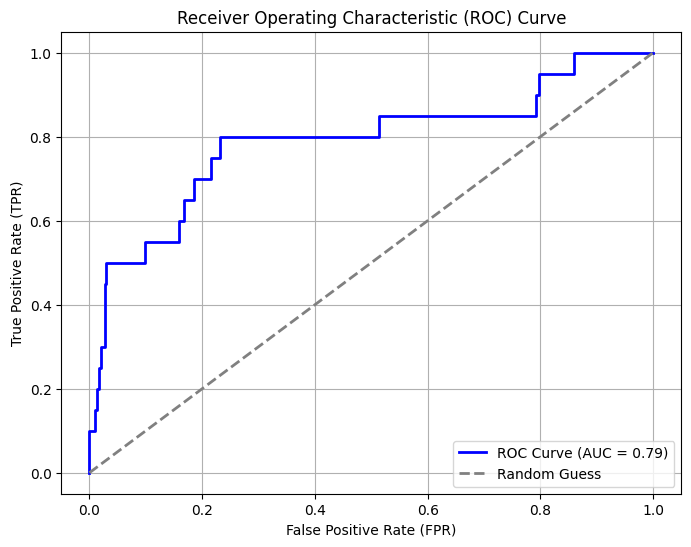

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_proba = ensemble_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

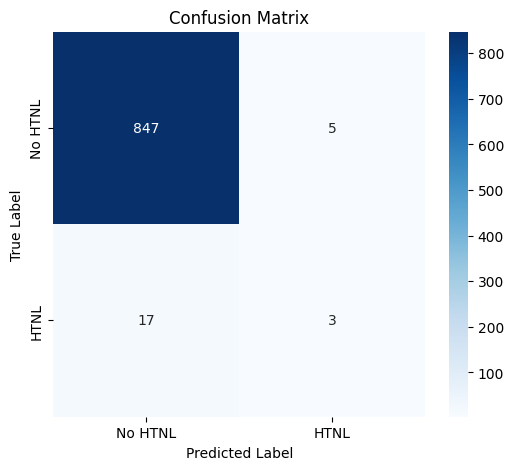

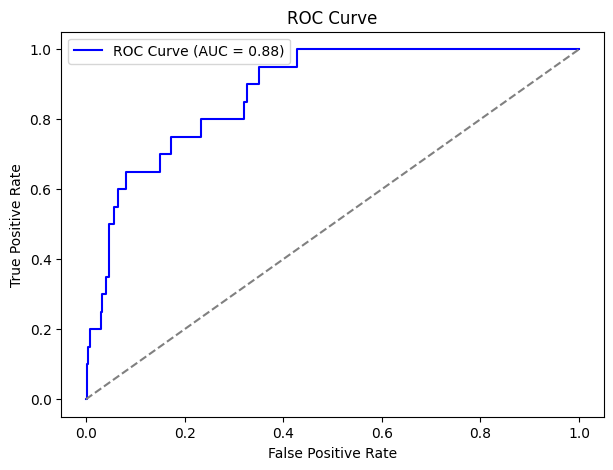

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No HTNL', 'HTNL'], yticklabels=['No HTNL', 'HTNL'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Compute ROC Curve and AUC
y_test_proba = stacking_model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# Neural network meta learner

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3405, number of negative: 3405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 6810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

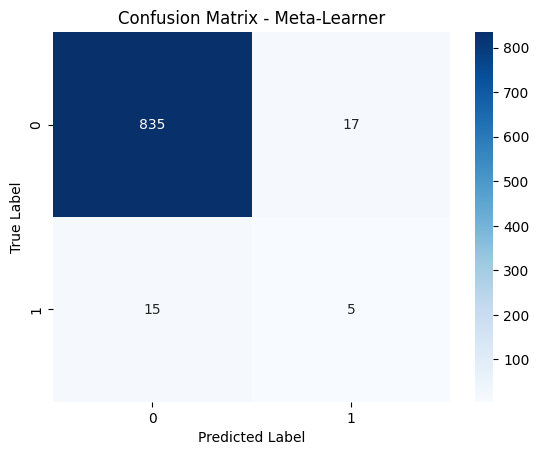

In [70]:
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Define individual models
lgbm_model = LGBMClassifier(
    num_leaves=34,
    max_depth=3,
    learning_rate=0.010111341400140444,
    n_estimators=764,
    reg_alpha=0.0411997885785947,
    reg_lambda=0.010461909585077636,
    class_weight='balanced',
    random_state=42
)

log_reg_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced',
    solver='liblinear',
    C=0.5,
    penalty='l2'
)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,  # Reduce tree depth
    min_samples_split=2,  # Require more samples to split
    min_samples_leaf=1,  # Ensure minimum samples per leaf
    class_weight="balanced",  # Handle class imbalance
    random_state=42,
    n_jobs=-1
)

final_tree_model = DecisionTreeClassifier(
    ccp_alpha=0.0006959451971296374,  # Keep the best pruning value
    class_weight="balanced",
    max_depth=20,  # From best hyperparameters
    min_samples_split=2,
    min_samples_leaf=5,
    random_state=42
)

# Create an ensemble using soft voting
ensemble_model = VotingClassifier(
    estimators=[
        ('lgbm', lgbm_model),
        ('log_reg', log_reg_model),
        ('rf', rf_model),
        ('dt', final_tree_model)
    ],
    voting='soft'  # Use probability-based voting
)

# Fit the ensemble model to training data
ensemble_model.fit(X_train_resampled, y_train_resampled)

# Extract predictions from the base ensemble model as meta-features
X_train_meta = ensemble_model.predict_proba(X_train_resampled)
X_test_meta = ensemble_model.predict_proba(X_test)

# Define a neural network as the meta-learner
meta_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_meta.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # For binary classification
])

meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the meta-learner neural network
meta_model.fit(X_train_meta, y_train_resampled, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions with the meta-learner
meta_predictions = meta_model.predict(X_test_meta)
y_meta_pred = (meta_predictions > 0.5).astype(int)

# Evaluate the meta-learner
meta_accuracy = accuracy_score(y_test, y_meta_pred)
meta_precision = precision_score(y_test, y_meta_pred, average='macro')
meta_recall = recall_score(y_test, y_meta_pred, average='macro')
meta_f1 = f1_score(y_test, y_meta_pred, average='macro')

print("=== Evaluation Results for Neural Network Meta-Learner ===")
print(f"Accuracy: {meta_accuracy:.2f}, Precision: {meta_precision:.2f}, Recall: {meta_recall:.2f}, F1: {meta_f1:.2f}")

# Confusion Matrix for Meta-Learner
meta_conf_matrix = confusion_matrix(y_test, y_meta_pred)
sns.heatmap(meta_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Meta-Learner')
plt.show()

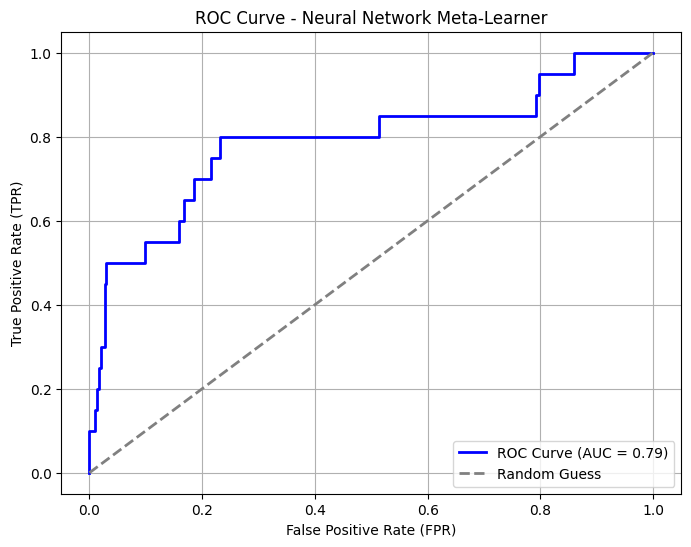

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Extract predicted probabilities for the positive class
y_meta_proba = meta_predictions.flatten()  # Flatten the predictions to 1D array

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_meta_proba)

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_meta_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Neural Network Meta-Learner')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Neural network

213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
=== Neural Network Evaluation Results ===
Train - Accuracy: 0.71, Precision: 0.78, Recall: 0.71, F1: 0.68
Test  - Accuracy: 0.95, Precision: 0.49, Recall: 0.49, F1: 0.49


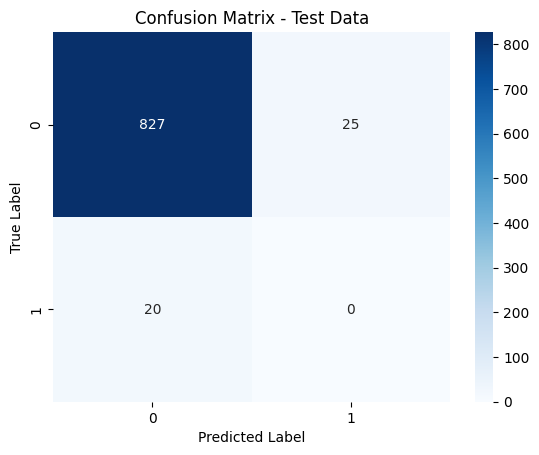

In [61]:
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = keras.Sequential(
    [
        keras.layers.Dense(units=9, activation="relu", input_shape=(X_train_resampled.shape[-1],) ),
        # randomly delete 30% of the input units below
        keras.layers.Dropout(0.3),
        keras.layers.Dense(units=9, activation="relu"),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# save the initial weights for later
initial_weights = model.get_weights()
keras.utils.plot_model(model, show_shapes=True)
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta = 0.0002, # minimium amount of change to count as an improvement
    patience  = 20,     # how many epochs to wait before stopping
    restore_best_weights=True,
)

model.set_weights(initial_weights)
history = model.fit(X_train_resampled, y_train_resampled,
          epochs=500,
          batch_size=1000,
          verbose=0,
          callbacks=[early_stopping]
        )

# Predict on train and test data
y_train_pred_probs = model.predict(X_train_resampled)
y_train_pred = (y_train_pred_probs > 0.5).astype(int)

y_test_pred_probs = model.predict(X_test)
y_test_pred = (y_test_pred_probs > 0.5).astype(int)

# Calculate metrics for train data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred, average='macro')
train_recall = recall_score(y_train_resampled, y_train_pred, average='macro')
train_f1 = f1_score(y_train_resampled, y_train_pred, average='macro')

# Calculate metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print("=== Neural Network Evaluation Results ===")
print(f"Train - Accuracy: {train_accuracy:.2f}, Precision: {train_precision:.2f}, Recall: {train_recall:.2f}, F1: {train_f1:.2f}")
print(f"Test  - Accuracy: {test_accuracy:.2f}, Precision: {test_precision:.2f}, Recall: {test_recall:.2f}, F1: {test_f1:.2f}")



# Confusion Matrix for Test Data
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Data')
plt.show()

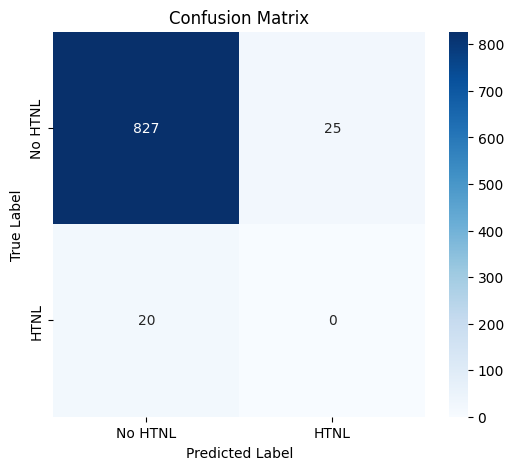

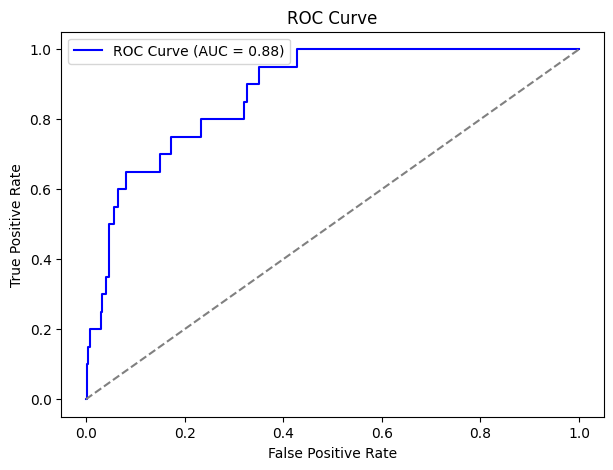

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No HTNL', 'HTNL'], yticklabels=['No HTNL', 'HTNL'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Compute ROC Curve and AUC
y_test_proba = stacking_model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
